# Burgers' Equation

Here we solve the Burgers' equation $u_t + u u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=10\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# Define the domain
L = 10.0        # Domain length
nx = 10001       # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the initial condition
x0 = 5
u_initial = 10*np.exp(-(x-x0)**2)

# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.max(u_initial) # Time step
t_final = 0.5

print('nx=', nx)
print('dx=', dx)
print('dt=', dt)
print('Number of iterations=', t_final/dt)

# Initialize the solution array
u_current = u_initial.copy()

# We create arrays where we will store the time and the l2norm
l2norm = []
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time = []
time.append(0.0)

nx= 10001
dx= 0.001
dt= 5e-05
Number of iterations= 10000.0


In [2]:
# Initilize time and iteration counter
t = 0.0
i = 0

# Save the initial conditions
plt.plot(x, u_current)
plt.title(f'Time={round(t,2):.2f}')
plt.ylim(0, 10.1)
plt.savefig('./images/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    print(math.ceil(100*t/t_final), "%", end='\r')
    
    # Compute the new solution using various methods
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and np.roll(u_current,  1) is equivalent to u(j-1)
    # Using np.roll is equivalent to use periodic boundary conditions
    
    # 1) Non flux-conservative form
    #u_next = u_current - (dt/dx)*u_current*(u_current - np.roll(u_current, 1))
    
    # 2) Flux-conservative form
    u_next = u_current - (dt/dx)*(0.5*(u_current)**2 - 0.5*(np.roll(u_current, 1))**2)  
    
     
    # Update the solution
    u_current = u_next.copy()
    
    # Advance the time 
    t += dt
    i += 1
    
    # Compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    # Plot the current result and save in an image every t_final/dt/100 iterations
    if (i%(t_final/dt/100)==0):
        plt.plot(x, u_current)
        plt.title(f'Time={round(t,2):.2f}')
        plt.ylim(0,10.1)
        plt.savefig('./images/fig_'+str(i).zfill(6)+'.png', dpi=200)
        #np.save('./results/Cons_u'+str(nx-1)+'_'+str(i)+'.npy', u_current)
        plt.close()

In [3]:
#np.save('./results/Cons_u'+str(nx-1)+'.npy', u_current)
#np.save('./results/Cons_l2norm'+str(nx-1)+'.npy', l2norm)
#np.save('./results/NONCons_u'+str(nx-1)+'.npy', u_current)
#np.save('./results/NONCons_l2norm'+str(nx-1)+'.npy', l2norm)

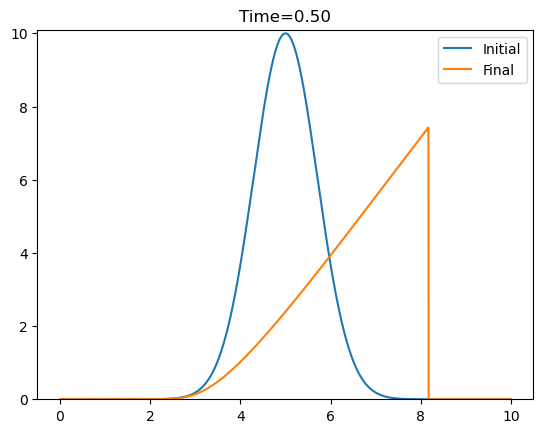

In [4]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title(f'Time={round(t,2):.2f}')
plt.ylim(0, 10.1)
plt.legend()
plt.show()

In [5]:
# Set the directory where your images are stored
directory = "./images/"

# Get the list of image files in the directory
files = os.listdir(directory)

# Sort the files in alphanumeric order
files = sorted(files)

print(files)

import imageio
with imageio.get_writer('./images/movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images/'+file)
        writer.append_data(image)

['fig_00000.png', 'fig_000100.png', 'fig_000200.png', 'fig_000300.png', 'fig_000400.png', 'fig_000500.png', 'fig_000600.png', 'fig_000700.png', 'fig_000800.png', 'fig_000900.png', 'fig_001000.png', 'fig_001100.png', 'fig_001200.png', 'fig_001300.png', 'fig_001400.png', 'fig_001500.png', 'fig_001600.png', 'fig_001700.png', 'fig_001800.png', 'fig_001900.png', 'fig_002000.png', 'fig_002100.png', 'fig_002200.png', 'fig_002300.png', 'fig_002400.png', 'fig_002500.png', 'fig_002600.png', 'fig_002700.png', 'fig_002800.png', 'fig_002900.png', 'fig_003000.png', 'fig_003100.png', 'fig_003200.png', 'fig_003300.png', 'fig_003400.png', 'fig_003500.png', 'fig_003600.png', 'fig_003700.png', 'fig_003800.png', 'fig_003900.png', 'fig_004000.png', 'fig_004100.png', 'fig_004200.png', 'fig_004300.png', 'fig_004400.png', 'fig_004500.png', 'fig_004600.png', 'fig_004700.png', 'fig_004800.png', 'fig_004900.png', 'fig_005000.png', 'fig_005100.png', 'fig_005200.png', 'fig_005300.png', 'fig_005400.png', 'fig_00550

C:\Users\Marco\AppData\Local\Temp\ipykernel_17956\1298765993.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('./images/'+file)


In [6]:
# Don't worry about the code in this cell, it is just to let you display the movies you generated above in Jupyter notebook
#from IPython.display import HTML
#
#HTML("""
#<div align="middle">
#<video width="80%" controls>
#      <source src="./images/movie.mp4" type="video/mp4">
#</video></div>""")

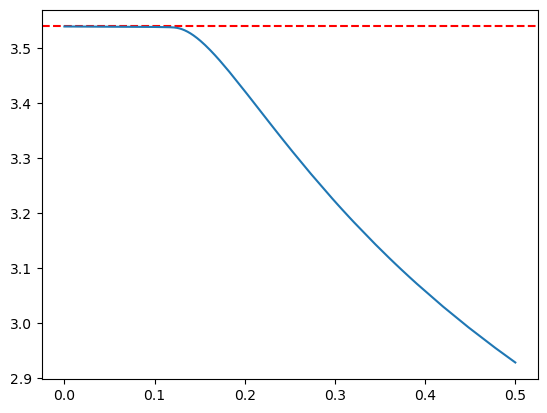

In [7]:
plt.plot(time, l2norm)
plt.axhline(l2norm[0], ls='--', color='red', zorder=0)
plt.show()